# Plot results of training

In [3]:
import argparse
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from time import time, strftime, gmtime
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from LstmNet import *
from train_model import *

In [4]:
# Hyper parameters
dataset_path = 'data/stocks.csv'
n_stocks = 26
batch_size = 8
hidden_dim = 128
num_layers = 3

In [2]:
# Import the dataset
df = pd.read_csv(dataset_path)

# Converting into a numpy array
dataset = df.to_numpy()

# Normalizing data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_dataset = scaler.fit_transform(df)

# Separating the train and test sets
train_dataset, _ = train_test_split(
    scaled_dataset,
    test_size=0.15,
    shuffle=False
)

# Get training and test size
train_size, input_dim = train_dataset.shape

NameError: name 'pd' is not defined

In [11]:
# Load a model

model = LSTMNet(input_dim,
	hidden_size = hidden_dim,
	num_layers = num_layers,
	out_size = input_dim)

model_path = 'results/2026-01-11_23-54-19/model.pth'
model.load_state_dict(torch.load(model_path, weights_only=True))
model.to('cpu')
model.eval()

LSTMNet(
  (lstm): LSTM(1, 64, num_layers=2, batch_first=True)
  (linear1): Linear(in_features=64, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=1, bias=True)
)

In [12]:
input_dim

1

In [13]:
# Semi supervised auto-regression
idx = 17
assert(idx < input_dim)

outputs = []
labels = []

for k in range(0, len(scaled_dataset), batch_size):
    # Put the data on the appropriate device
    if k == 0:
        hn = torch.zeros(model.num_layers, model.hidden_size)
        cn = torch.zeros(model.num_layers, model.hidden_size)
        continue
    inp = torch.from_numpy(scaled_dataset[k-batch_size:k]).to(torch.float32)
    label = torch.from_numpy(scaled_dataset[k - batch_size + 1 : k + 1]).to(torch.float32)
    
    # Computation of the output
    output, (hn, cn) = model(inp, (hn, cn))

    # Saving results
    outputs.extend(output[:, idx].tolist())
    labels.extend(label[:, idx].tolist())


#outputs = scaler.inverse_transform([[0, 0, 0, i, 0, 0] for i in outputs])
#labels = scaler.inverse_transform([[0, 0, 0, i, 0, 0] for i in labels])
plt.plot([labels[i] for i in range(len(labels))], label = 'Label')
plt.plot([outputs[i] for i in range(len(outputs))], label = 'Model')
plt.title(f'Predictions at index {idx} vs real')
plt.axvline(x=train_size, color = 'r', label = 'End of training')
plt.legend()
plt.show()

AssertionError: 

## Plot electricity

In [5]:
dataset_path = 'data/electricity.csv'
batch_size = 8
hidden_dim = 64
num_layers = 2

In [33]:
# Import the dataset
col = 'AEP_MW'
df = pd.read_csv(dataset_path)[[col]]

# Converting into a numpy array
dataset = df.to_numpy()

# Normalizing data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_dataset = scaler.fit_transform(df)

# Separating the train and test sets
train_dataset, test_dataset = train_test_split(
    scaled_dataset,
    test_size=0.15,
    shuffle=False
)

# Get training and test size
train_size, input_dim = train_dataset.shape
len(df)

121273

In [34]:
# Load a model

model = LSTMNet(input_dim,
	hidden_size = hidden_dim,
	num_layers = num_layers,
	out_size = input_dim)

model_path = 'electricity/2026-01-27_22-55-01/model.pth'
model.load_state_dict(torch.load(model_path, weights_only=True))
model.to('cpu')
model.eval()

LSTMNet(
  (lstm): LSTM(1, 64, num_layers=2, batch_first=True)
  (linear1): Linear(in_features=64, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=1, bias=True)
)

In [35]:
start = 12220
end = start + 20
input_dim

1

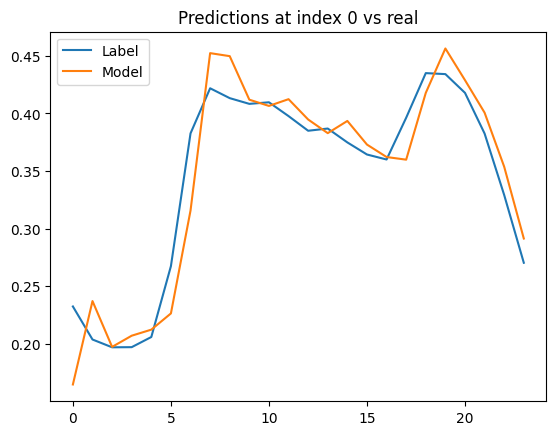

In [36]:
# Semi supervised auto-regression
idx = 0
assert(idx < input_dim)

outputs = []
labels = []

for k in range(start, end, batch_size):
    # Put the data on the appropriate device
    if k == 0:
        hn = torch.zeros(model.num_layers, model.hidden_size)
        cn = torch.zeros(model.num_layers, model.hidden_size)
        continue
    inp = torch.from_numpy(scaled_dataset[k-batch_size:k]).to(torch.float32)
    label = torch.from_numpy(scaled_dataset[k - batch_size + 1 : k + 1]).to(torch.float32)
    
    # Computation of the output
    output, (hn, cn) = model(inp, (hn, cn))

    # Saving results
    outputs.extend(output[:, idx].tolist())
    labels.extend(label[:, idx].tolist())


#outputs = scaler.inverse_transform([[0, 0, 0, i, 0, 0] for i in outputs])
#labels = scaler.inverse_transform([[0, 0, 0, i, 0, 0] for i in labels])
plt.plot(labels, label = 'Label')
plt.plot(outputs, label = 'Model')
plt.title(f'Predictions at index {idx} vs real')
if train_size < end and train_size > start:
    plt.axvline(x=train_size, color = 'r', label = 'End of training')
plt.legend()
plt.show()

Tests en autoregressif

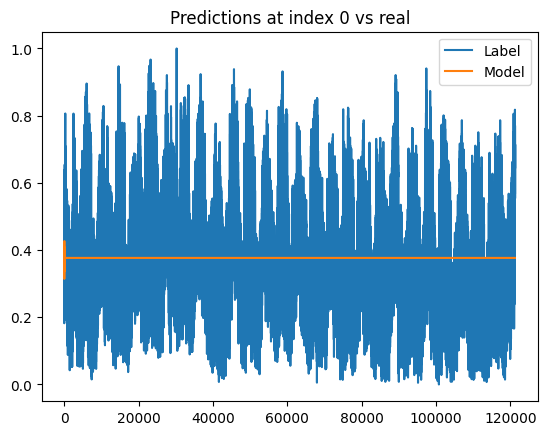

In [42]:
idx = 0
outputs = []
labels = []
train_size = len(train_dataset)
window_size = 64

model.eval()
for k, data in enumerate(train_dataset):
    # Put the data on the appropriate device
    labels.append(data[idx].item())
    if k == 0:
        inp = torch.Tensor(data)
        hn = torch.zeros(model.num_layers, model.hidden_size)
        cn = torch.zeros(model.num_layers, model.hidden_size)
        train_outputs.append(data[idx].item())
        continue
    if k < window_size:
        inp = torch.cat((inp, torch.Tensor(data)), dim = 0)
        train_outputs.append(data[idx].item())
        continue
    

    # Computation of the output
    output, (hn, cn) = model(inp.unsqueeze(dim = 1), (hn, cn))
    outputs.append(output[-1, idx].item())
    inp = output[-1, :]

for k, data in enumerate(test_dataset):
    # Put the data on the appropriate device
    labels.append(data[idx].item())
    
    # Computation of the output
    output, (hn, cn) = model(inp.unsqueeze(dim = 1), (hn, cn))
    outputs.append(output[-1, idx].item())
    inp = output[-1, :]

plt.plot(labels, label = 'Label')
plt.plot(outputs, label = 'Model')
plt.title(f'Predictions at index {idx} vs real')
if train_size < end and train_size > start:
    plt.axvline(x=train_size, color = 'r', label = 'End of training')
plt.legend()
plt.show()